In [1]:
import sys
import pandas as pd
import sqlite3
from sqlite3 import Error

### Open database

In [51]:
conn = sqlite3.connect('benchmark.sqlite')
c = conn.cursor()

### Create database table if it does not exist 

In [3]:
c.execute("CREATE TABLE IF NOT EXISTS benchmarks (\
id INTEGER PRIMARY KEY AUTOINCREMENT,\
software TEXT NOT NULL,\
version TEXT NOT NULL,\
module TEXT,\
system TEXT NOT NULL,\
cpu_arch TEXT NOT NULL,\
NVLink TEXT NOT NULL,\
cores INTEGER NOT NULL,\
tasks INTEGER NOT NULL,\
GPUs INTEGER NOT NULL,\
atoms INTEGER NOT NULL,\
rate REAL NOT NULL,\
command TEXT)")

### Prepare entry

In [58]:
software = 'GROMACS'
version = '20'
module = 'amber/20.9-20.15'
system = 'Cedar'
cpu_arch = 'Broadwell'
NVLink = 'no'
cores = '16'
tasks = '1'
GPUs = '1'
atoms = '300000'
rate = '1000'
command = 'pmemd.cuda'

### Add entry to the table

In [59]:
entry = '","'.join([software,version,module,system,cpu_arch,NVLink,cores,tasks,GPUs,atoms,rate,command])
entry='"'+entry+'"'
c.execute("INSERT INTO benchmarks (\
software,version,module,system,cpu_arch,NVLink,cores,tasks,GPUs,atoms,rate,command)\
VALUES" + "("+entry+")") 
conn.commit()

### Select all unique records

In [63]:
df = pd.read_sql_query("SELECT DISTINCT * from benchmarks ORDER BY rate;", conn)

### Select all 16-core benchmarks

In [66]:
df = pd.read_sql_query("SELECT DISTINCT * from benchmarks WHERE cores=16 ORDER BY rate;", conn)

### Select all benchmarks with rate > 10.0

In [71]:
df = pd.read_sql_query("SELECT DISTINCT * from benchmarks WHERE rate>10 ORDER BY rate;", conn)

### Define labels

In [80]:
df['label']=df['software']+' '+df['version']+', '
df['label']+=df['tasks'].astype(str)+'Tx'
df['label']+=df['cores'].astype(str)+'Cx'
df['label']+=df['GPUs'].astype(str)+'GPU, '

<AxesSubplot:ylabel='label'>

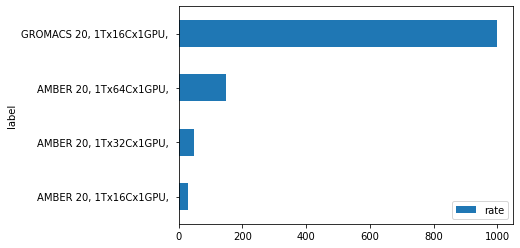

In [81]:
df.plot(y='rate',x='label',kind='barh',logx=False)

In [86]:
df2=df.drop(columns=['label','module','command','atoms'])
print(df2)

   id software version system   cpu_arch NVLink  cores  tasks  GPUs    rate
0   1    AMBER      20  Cedar  Broadwell     no     16      1     1    28.1
1   2    AMBER      20  Cedar  Broadwell     no     32      1     1    48.1
2   3    AMBER      20  Cedar  Broadwell     no     64      1     1   148.1
3   5  GROMACS      20  Cedar  Broadwell     no     16      1     1  1000.0


In [ ]:
c.close()
conn.close()